# Biologically Inspired Robotics

Dr. Arpan Charkraborty PHD - bio inspired computer vision

---

Applications
* search rescue
* too hostile for humans
* nano robots
* underwater robots
* medical applications (micro robots)

Modeling on animals taps into evolutionary solutions. They also provide a control for your output. Sometimes the application of the robot requires a biologically inspired design. Robots need to adapt to the environment that they find themselves in. Animals like cockroaches have failsafes also, which enables them to continue even when damages or missing appendages.

Actuators are any component that allows the robot to move. Traditional actuators area not as efficient as their bilogical equivalents. 

Batteries (dead weight) - Bio systems don't have batteries. Just now exploring bio-inspired energy storage. (using currents of see to charge)

Grasping and manipulation - Alot of complexity. Haptic feedback tells animal how hard to grasp (sheer), being used now in robotics.

Limitations of bio-inspirations - Hardware is different from robots to animals. Our design choices are limited to the materials we have. 




### Computer vision - parallels human vision. 2 eyes allow depth perception and focus. 
* Optic flow - how the image changes conveys movement
* Foveal vision - allows focused resolution with low res base
* Radial vision (polar coordinate system) with biological systems
* Bees use UV spectrum (easier to ID flowers) tuned for specific application
* Resilence in vision - Processing of info is distributed - moving and fixation allows cleaner visual signal


### Control and Learning
* Control systems form the mapping between perception and action
* how do you combine multiple sources of complexity (vision, actuation) and build behaviors that make sense?
* Behavior based robotics - breakdown overall functining of robots into simple behaviors then a mechanism that combine their performance
* Exploration 
> * low - avoid objects
> * middle - wander around
> * top - keep an eye on where it has been and encourage to go to new places

**Subsumption Architecture** - way to combine architecture solutions

**Reinforcement Architecture** - Exploration and exploitation (Trial and Error) - jointly optimize different parameters based on the end result. i.e., training a robot to play ping pong. Facilitated by a reward or reinforcing function letting the robot know that it was successful or not.


---

### First takeoff of a Biologically Inspired at-scale robotic insect

"meso" scale rapid fab method called SCM (smart composite microstructures)

* search and rescue
* haz mat
* surveillance/reconnaissance
* planatary exploration


---

### Cheeta-cub Quadruped Robot

* Experimentation with locomotion and fast trotting gaits. 

* Used a spring loaded, pantograph mechanism with multiple segments

The **Froude number** may be used to study trends in animal gait patterns. In analyses of the dynamics of legged locomotion, a walking limb is often modeled as an inverted pendulum, where the center of mass goes through a circular arc centered at the foot.[10] The Froude number is the ratio of the centripetal force around the center of motion, the foot, and the weight of the animal walking:

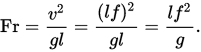

where {\displaystyle m} m is the mass, {\displaystyle l} l is the characteristic length, {\displaystyle g} g is the acceleration due to gravity and {\displaystyle v} v is the velocity. The characteristic length, {\displaystyle l} l, may be chosen to suit the study at hand. For instance, some studies have used the vertical distance of the hip joint from the ground,[11] while others have used total leg length.[10][12]

The Froude number may also be calculated from the stride frequency f as follows:[11]

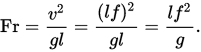


The implementation of multi-segment, compliant legs presents a major biological solution to cover large distances, cross rough terrain, swim, climb trees, accelerate and decelerate swiftly, change directions, change gait and run energy efficiently, or jump.

Legs are designed as 3 and 4 segmented appendages with passive compliant elements on a pantograph leg configuration.

**Pantograph** A scissoring mechanical linkage that can compress or extend like an accordion.

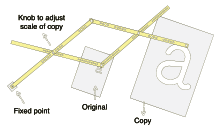

The pantographical mechanism was found to be a good approximate of animal leg kinematics during cyclic locomotion, where proximal and distal leg segments keep their relative angular orientation during the most parts of the locomotion cycle.

**CPG - Central Pattern Generator** network in open loop patterns.  (only with inter-oscillatory coupling, no sensory feedback)

From Widipedia: CPGs are biological neural networks that produce rhythmic patterned outputs without sensory feedback.  A CPG could be crudely analogized to the pendulum of a clock, generating a repeating signal at a constant frequency in order to coordinate rhythmic motions. CPGs have been shown to produce rhythmic outputs resembling normal "rhythmic motor pattern production" even in isolation from motor and sensory feedback from limbs and other muscle targets. To be classified as a rhythmic generator, a CPG requires:
* Two or more process that interact such that each process sequentially increases and decreases
* As a result of this interaction, the systeme reapeatedly returns to its starting condition




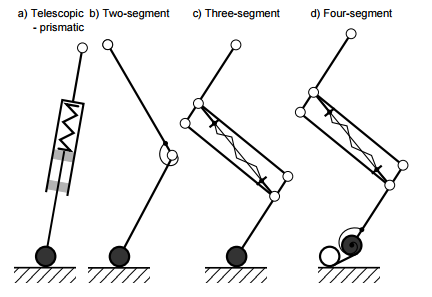

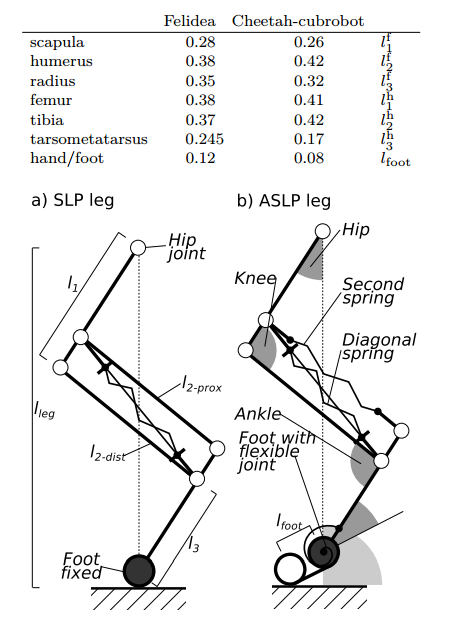


* open loop,self-stabilizing, four-segment, compliant quadriped that can walk or trot on flat ground.

---

### OpenRatSLAM

RatSLAM is a navigational framework that is configured to mimic how a rodent processes navigation.

#### SLAM - Appearance-based Simultaneous Localization and Mapping

* appearance based systems take visual features from images and translate them to a navigational framework
* RatSLAM is an alternative (based on how a rat's brain works) that uses a filtering technique that makes guesses based on accumulating sensor data
* Can work with ill-defined information

#### This paper is a presentation of a software functional library - OpenRatSLAM
 * open source - offline/online
 * path planning



##### RatSLAM

RatSLAM is based on models of the nav process of the rat brain. Which consists of 3 major modules: 
* Pose
* Experience (map)
* Local View

The **Pose cells** are a **Continuous Attractor Network (CAN)** with inhibitor/excitor connections.  Roughly a 3d prism connected to other cells.  Dimensionally these cells approximate the 3d position of the robot.

The network dynamics form a state of activated units (**activity packet**) where its centroid is the model of it's best guess of its pose (where it exists at the moment in relation to its experience)

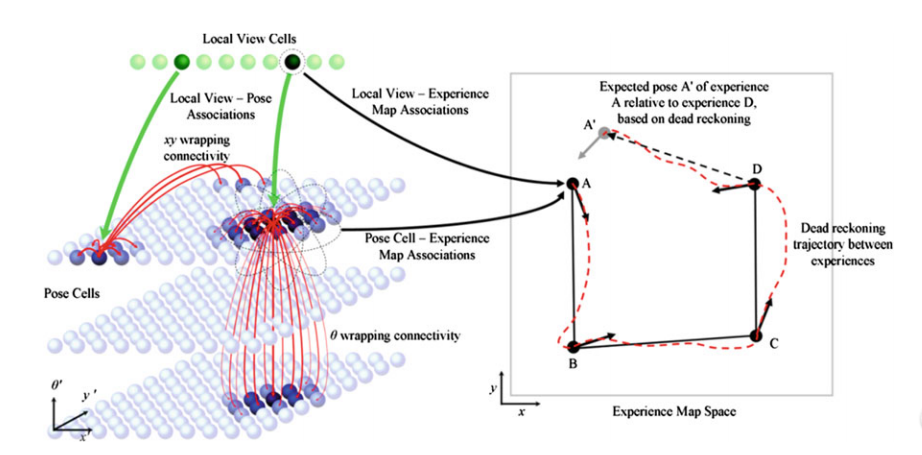

The ** Local View** cells make up an array of units, each of which is a distinct **View** (image) of the scene. Each image forms a excitatory link between the local view cell and the **centroid of dominant activity packet** in the pose cells.

The **Experience Map** is a graphical map that estimates the robot's pose by combining information form the pose cells and the local view cells. Each node in the map is a 3-tuple.  As the robot transitions between experiences a link is formed to the previous experience.


##### OpenRatSLAM

The open ratSLAM is different in that it consists of 4 nodes which is more modular and takes advantage of separate processes.

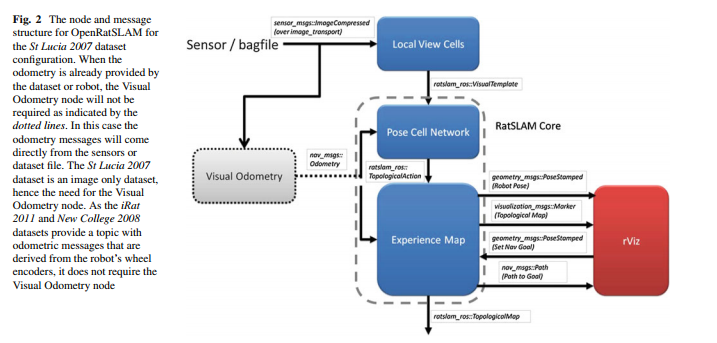

* Pose Cell Network: manages energy packet that represents the pose in response to the odometric and local view connections.  Also makes decisions aobut the experience map and link creation.
    * 2 types of input: odeometry and view templates.  Received as ROS Messages
    * action depends on wheter the view is new or template
    * new view templates, the id is associated with the centroid of the current peak activity packet in the pose cell network
    * existing view template activity is injected into the previously associated location in the pose cells.
* Local View Cells:  determines whether a scene given byt the current view is novel or familiar by using image comparison techniques
    * processes current image (probably grayscale) into a *visual template* 
    * remove visually bland areas of image
* Experience map: This node manages graph building, graph relaxation and path planning
    * uses received actions to create nodes and links or to set the current node
    * new nodes create link to previous node
    * Publishes 3 messages to expose the state of the experience map
        * topological map
        * pose of the robot within the experience map
* Visual Odometry: For image only datasets, this node provides an odometric estimate based on changes in the visual scene.
    * compares successive images
    * separate sections of images can be specified to determine different facets of movement or rotation. Rotational offset is determined by lateral movement of visual data
